In [4]:
X_train = open('X_train.txt')
line = X_train.readline()
train = list()
while line:
    line = line.strip('\n')
    line = line.split()
    train.append(line)
    line = X_train.readline()
print(type(train))
print(len(train))
print(type(train[0]))

<class 'list'>
341072
<class 'list'>


In [3]:
pip install nltk

In [2]:
from keras.layers.core import Activation, Dense
from keras.preprocessing.text import Tokenizer
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing import sequence
import keras 
import collections
import numpy as np

Using TensorFlow backend.


In [0]:
y_train = open('y_train.txt')
label = list()
line = y_train.readline()
while line:
    line = line.strip('\n')
    line = line.split()
    label.append(int(line[0]))
    line = y_train.readline()

In [0]:
import numpy as np
label = np.array(label)
train = np.array(train)

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train)

In [0]:
vocab=tokenizer.word_index

In [8]:
len(vocab)

383395

In [0]:
encoded_train = tokenizer.texts_to_sequences(train)

In [11]:
len(encoded_train)

341072

In [12]:
type(encoded_train)

list

In [0]:
encoded_train = np.array(encoded_train)

In [14]:
len(encoded_train)

341072

In [0]:
temp_len = 0
for i in range(len(encoded_train)):
    if(len(encoded_train[i]) > temp_len)
    temp_len = len(encoded_train[i]) 

mean_len = temp_len
mean_len = int(mean_len)

encoded_train = sequence.pad_sequences(encoded_train, maxlen=mean_len)

In [16]:
mean_len

3432

In [17]:
len(encoded_train)

341072

In [0]:
label = label.reshape(-1,1)

In [19]:
label.shape

(341072, 1)

In [0]:
label_train = keras.utils.to_categorical(label)

In [21]:
len(vocab)

383395

In [22]:
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras import layers
from keras.optimizers import Adam
from keras.models import Model,Sequential
import keras
embedding_dim = 256
model = Sequential()
model.add(layers.Embedding(len(vocab)+1, embedding_dim,input_length=mean_len))
model.add(layers.Conv1D(256, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(Dense(6,activation='softmax'))
print(model.summary())




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 3432, 256)         98149376  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3428, 256)         327936    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1542      
Total params: 98,478,854
Trainable params: 98,478,854
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
adam = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(encoded_train, label_train,epochs=12,verbose=1,batch_size=500)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/12





341072/341072 [==============================] - 458s 1ms/step - loss: 0.8502 - acc: 0.6940
Epoch 2/12
341072/341072 [==============================] - 446s 1ms/step - loss: 0.6438 - acc: 0.7608
Epoch 3/12
341072/341072 [==============================] - 446s 1ms/step - loss: 0.5605 - acc: 0.7945
Epoch 4/12
341072/341072 [==============================] - 445s 1ms/step - loss: 0.4884 - acc: 0.8247
Epoch 5/12
341072/341072 [==============================] - 445s 1ms/step - loss: 0.4205 - acc: 0.8527
Epoch 6/12
341072/341072 [==============================] - 445s 1ms/step - loss: 0.3556 - acc: 0.8797
Epoch 7/12
341072/341072 [==============================] - 445s 1ms/step - loss: 0.2945 - acc: 0.9041
Epoch 8/12
341072/341072 [==============================] - 445s 1ms/step - loss: 0.2386 - acc: 0.9265
Epoch 9/12
341072/341072 [==============================] - 445s 1ms/ste

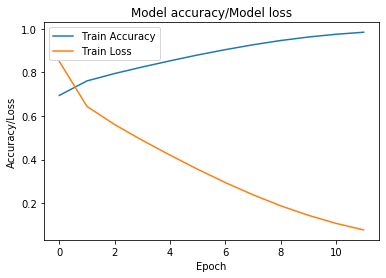

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
#plt.plot(history.history['val_acc'])
#plt.plot(history.history['val_loss'])
plt.title('Model accuracy/Model loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Train Loss'], loc='upper left')
plt.show()

In [33]:
X_test = open('X_test.txt')
line = X_test.readline()
test = list()
while line:
    line = line.strip('\n')
    line = line.split()
    test.append(line)
    line = X_test.readline()
print(type(test))
print(len(test))
print(type(test[0]))

<class 'list'>
113691
<class 'list'>


In [0]:
y_test = open('y_test.txt')
label_test = list()
line = y_test.readline()
while line:
    line = line.strip('\n')
    line = line.split()
    label_test.append(int(line[0]))
    line = y_test.readline()

In [0]:
encoded_test = tokenizer.texts_to_sequences(test)
encoded_test = np.array(encoded_test)
encoded_test = sequence.pad_sequences(encoded_test, maxlen=mean_len)

In [0]:
predict_test = model.predict(encoded_test)

In [38]:
acc_num = 0
for i in range(len(encoded_test)):
    cla = np.argmax(predict_test[i])
    if cla == label_test[i]:
        acc_num = acc_num + 1

print(acc_num/len(encoded_test))

0.8169600056292934
